<a href="https://colab.research.google.com/github/Nouman-wisal/pytorch/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
what_were_doing = {
    1: "Data (prepare and preload data)",
    2: "building model",
    3: "Training (fitting the model to data)",
    4: "inference (making prediction and evaluating the model)",
    5: "saving and loading the model",
    6: "putting it all togather"
}

what_were_doing

{1: 'Data (prepare and preload data)',
 2: 'building model',
 3: 'Training (fitting the model to data)',
 4: 'inference (making prediction and evaluating the model)',
 5: 'saving and loading the model',
 6: 'putting it all togather'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# check python version
torch.__version__

'2.6.0+cu124'

##1.Data (preparing and loading)
####data can be anything... in machine Learning/deepLearning

1.   excel spreadsheets
2.   videos (i.e youtube as a lot of videos/data)
3.   audio (songs,voice notes etc)
4.   images
5.   Text
6.   DNA

Deep learning/machine learning has two parts


1.   turn the data into numerical representations/tensors/numbers
2.   build model to find patterns in those numerical representation/tensors/numbers



Let's create our data as a straight line.

We'll use `linear regression` formula to make a straight line with *known* parameters.


In [ ]:
# create  *known* parameters

weight = 0.7
bias =0.3

# create

start=0
end=1
step=0.02

X= torch.arange(start, end, step).unsqueeze(dim=1)  # X  is the input (inputed numerical parameter)
# print( X ,"\n")

Y= weight * X + bias  # Y is the output
# print(Y,"\n")

print(len(X)) #data points
print(len(Y)) #data points
print(Y.shape)

50
50
torch.Size([50, 1])


##Splitting the data into `Training & Test` sets (one of the most important concepts in ml/dp)

In [ ]:
                                                                # splitting data for trainig & testing into 80 / 20

trainig_split= int(0.8 * len(X))

# print(trainig_split) # result 40

                                                                # slicing the X for trinig and testing
x_train= X[ :trainig_split] # meaning give data from index 0 to 40(till 39)
x_test= X[trainig_split: ]  # meaning dive data from index 40 till the end

# print(x_train,x_test)

y_train= Y[ : trainig_split]
y_test=  Y[trainig_split : ]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

##Visualizing the data with matplotlib in a function

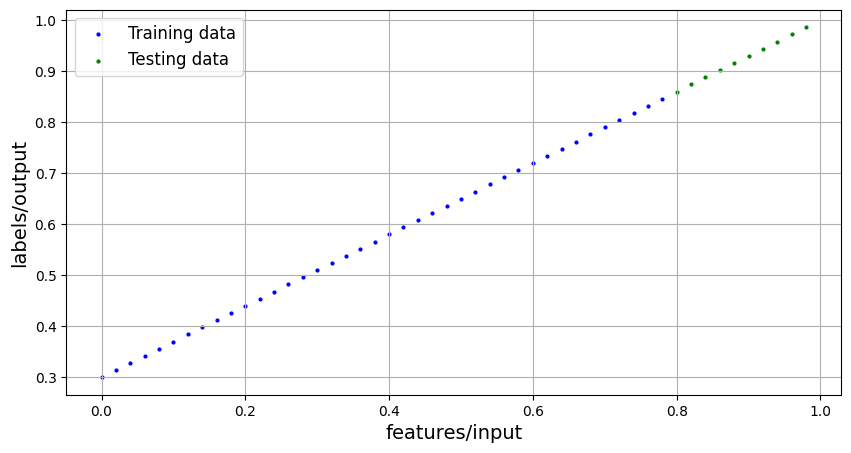

In [ ]:


def plot_predictions(training_data=x_train, trainig_label=y_train, test_data=x_test, test_label=y_test, prediction=None):

    plt.figure(figsize=(10,5))

    plt.scatter(training_data, trainig_label, c="b",s=4, label="Training data")

    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

    if prediction is not None:
#or if prediction != None:
#or if prediction: using truthy and falsy checks

      plt.scatter(test_data, prediction, c="r", s=8, label="prediction data")

    plt.legend(fontsize=12)
    plt.xlabel("features/input", size=14)
    plt.ylabel("labels/output", size=14)
    plt.grid()
    plt.show()

plot_predictions()

# Building the Model(Linear Regression Model)

In [ ]:
# building the model starts by creating a subclass of nn.module

class LinearRegressionModel(nn.Module):
  #creating a constructor

  def __init__(self):
    super().__init__() #inhering from nn.module

    self.weight = nn.Parameter(torch.randn(1), requires_grad=True) #nn.parameter requires requires_grad=True bcz it tracks the value/weight/bias bcz nn.Parameter lerarns the value/weight/bias
    self.bias = nn.Parameter(torch.randn(1), requires_grad=True)


    # all subclasses of nn.modules requies forward method/func for making predictions
    def forward(self, x:torch.Tensor)->torch.Tensor:   # x could be x_train or x_test
      return self.weight * x +self.bias


#   # caling or making models from our class(subclass)

# torch.manual_seed(42)
# model_0 = LinearRegressionModel()

# # Check the nn.Parameter(s) within the nn.Module subclass we created
# list(model_0.parameters())

# # model_0 = LinearRegressionModel()
# # list(model_0.parameters())


# making a model from class here

In [ ]:
# caling or making models from our class(subclass)
torch.manual_seed(42)

model_0 = LinearRegressionModel()
# list(model_0.parameters())        # Checks the nn.Parameter(s) within the nn.Module subclass we created

# 0r this way
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])